In [1]:
import pandas as pd
import seaborn as sns

In [8]:
our_color_palette = {"WT": "#F2C14E", # yellow
                     "W": "#F2C14E", # yellow
                     "IP": "#79ADDC", # blue
                     "I": "#79ADDC", # blue
                     "KO": "#B279A7", # purple
                     "K": "#B279A7", # purple
                    } 
treatments_list = ["W", "I", "K"]
passages_list = ["p1", "p2", "p3", "p5", "p10"]
replicates_list = ['a', 'b', 'c']

In [9]:
df = pd.read_csv('../../results_summary/all_snpgenie_population_summary.csv')

df['genotype'] = df['passage'].str.split("_").str[0]
df['rep'] = df['passage'].str.split("_").str[-1]
df['passage'] = df['passage'].str.split("_").str[1].str.split('p').str[-1].astype(int)

In [10]:
# get parental values
p0_dcv_pi = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi'].values[0]
p0_dcv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_coding'].values[0]
p0_dcv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='DCV') ]['pi_noncoding'].values[0]

# get parental values
p0_crpv_pi = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi'].values[0]
p0_crpv_pi_coding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_coding'].values[0]
p0_crpv_pi_noncoding = df[(df['genotype']=='parental') & (df['virus']=='CrPV') ]['pi_noncoding'].values[0]

In [11]:
df = df[df['genotype']!='parental']

In [13]:
df = df[['pi','genotype','rep','passage', 'virus']]

In [14]:
df

,pi,genotype,rep,passage,virus
1,0.000231,W,a,1,DCV
2,0.000245,W,b,1,DCV
3,0.000261,W,c,1,DCV
4,0.000195,K,a,1,DCV
5,0.000196,K,b,1,DCV
...,...,...,...,...,...
86,0.000209,I,b,3,CrPV
87,0.000183,I,c,3,CrPV
88,0.000313,W,a,5,CrPV
89,0.000195,W,b,5,CrPV


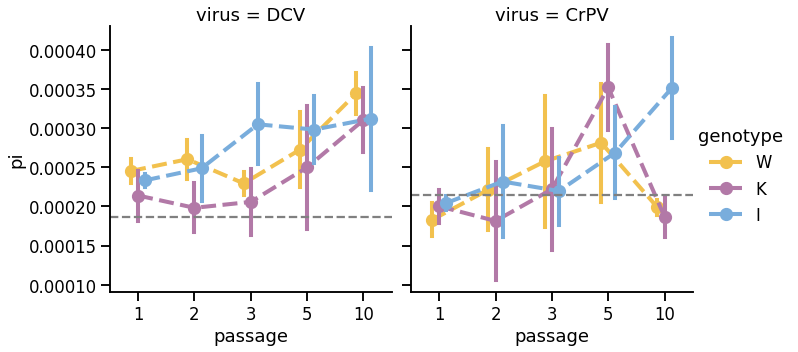

In [15]:
sns.set_context("talk") 

g = sns.catplot(df, 
                x='passage', 
                y='pi', 
                col='virus', 
                hue='genotype', 
                kind='point', 
                markers='o', 
                linestyles='--',
                dodge=0.25,
                errorbar='sd',
                palette=our_color_palette, 
                )

# Add vertical line to specific subplots
for ax in g.axes.flat:
    if ax.title.get_text() == 'virus = DCV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_dcv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
    if ax.title.get_text() == 'virus = CrPV':  # Add line to subplots where virus is A
        ax.axhline(y=p0_crpv_pi, color='gray', linestyle='--')  # Add vertical line at passage 3
#g.savefig("/Users/lfuhrmann/Downloads/oscar_diversity/nucleotide_diversity.full_genome.pdf")